# EJERCICIO

## DEFINICIÓN DEL PROBLEMA

**Vamos a trabajar con un dataframe sobre los datos de propinas que viene en la librería seaborn para intentar predecir que propina dejará una persona a partir de ciertos datos como sexo, importe...**

**Como criterio de evaluación vamos a usar RCME.**

## RECOPILACIÓN Y PREPARACIÓN DE LOS DATOS

### OBTENER LOS DATOS

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df_tips = sns.load_dataset('tips')

Significado de las columnas:
1. `total_bill`: Esta columna representa el monto total de la factura de una transacción en el restaurante, incluyendo la comida y las bebidas.

2. `tip`: En esta columna se registra la cantidad de propina que se dio en esa transacción.

3. `sex`: Indica el sexo del camarero o camarera que atendió la mesa (por ejemplo, "Male" para masculino y "Female" para femenino).

4. `smoker`: Esta columna indica si los comensales eran fumadores o no fumadores en la mesa (por ejemplo, "Yes" para fumadores y "No" para no fumadores).

5. `day`: Registra el día de la semana en el que se realizó la transacción (por ejemplo, "Thur" para jueves, "Fri" para viernes, "Sat" para sábado y "Sun" para domingo).

6. `time`: Indica si la transacción fue durante el almuerzo o la cena (por ejemplo, "Lunch" para almuerzo y "Dinner" para cena).

7. `size`: Representa el número de comensales en la mesa.

### EXPLORAR LOS DATOS

In [2]:
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [3]:
df_tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [4]:
df_tips.describe(include=['category'])

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


In [5]:
df_tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


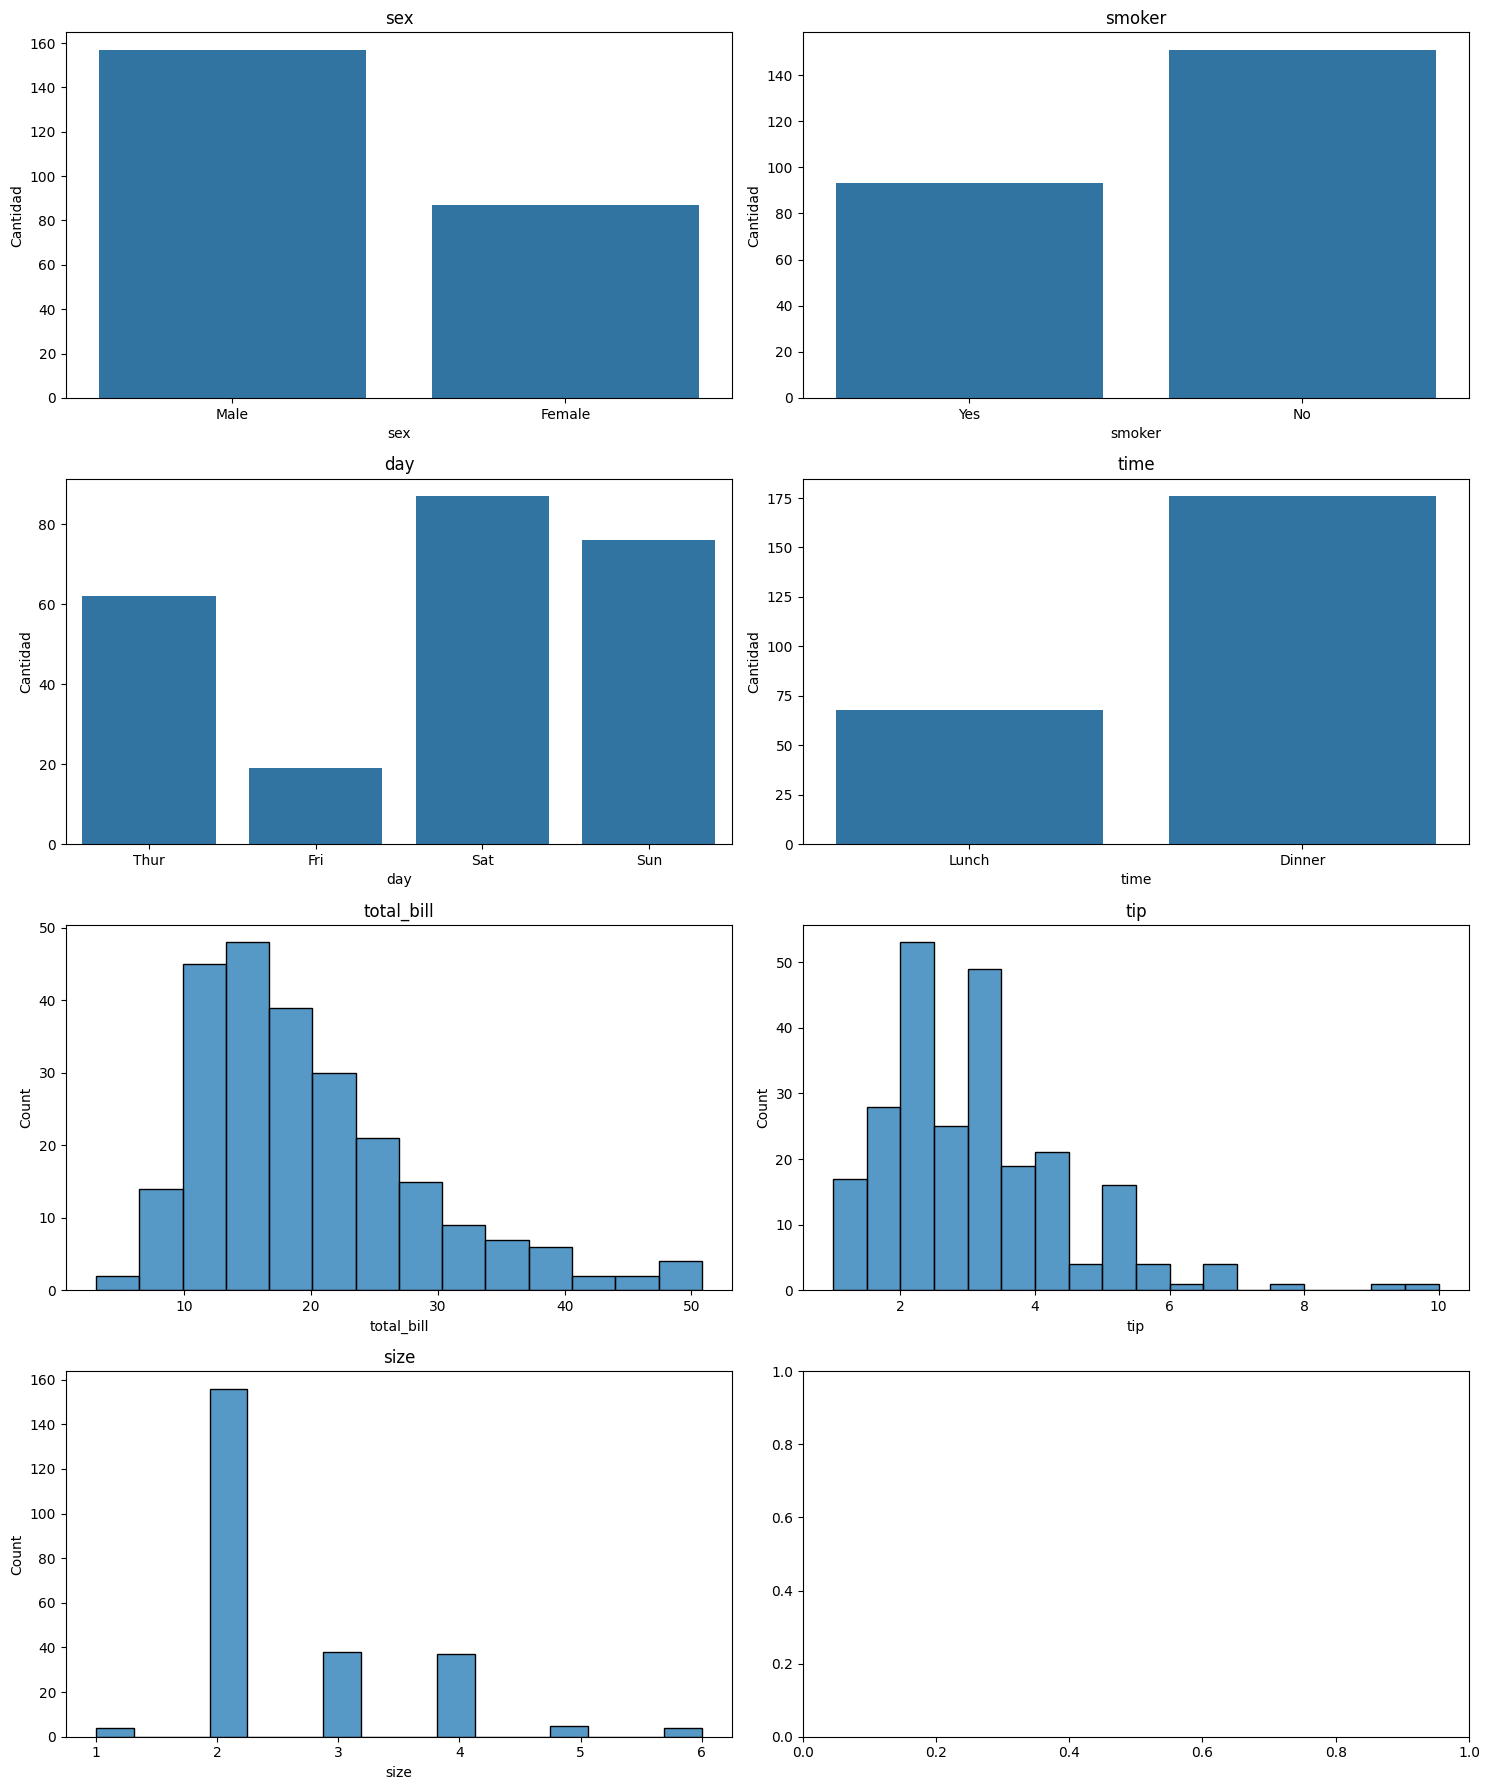

In [6]:
# total_bill(float)   tip(float)   sex(cat)   smoker(cat)   day(cat)   time(cat)  size(int)     .set_xticklabels(labels=['muerto','vivo'])

fig, ax = plt.subplots(4,2, figsize=(15,18))
ax = ax.flatten() # para poder hacer ax[i] en lugar de ax[i,j] porque el grafico se divide en más de una columna (4,2)
cols_nume = df_tips.select_dtypes(include=['int64','float64'])
cols_cate = df_tips.select_dtypes(include=['category'])
i=0
for col in cols_cate.columns:
    sns.countplot(data=df_tips, x=col, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_ylabel('Cantidad')
    i+=1
for col in cols_nume.columns:
    sns.histplot(data=df_tips, x=col, ax=ax[i])   # bins: agrupa los valores de x en 8 packs para que se entienda
    ax[i].set_title(col)
    i+=1


plt.tight_layout()   # margen entre los graficos
plt.show()

Entre los describe y las graficas concluyo:
- Hay algo mas del doble de cenas que comidas (sera que la gente se agrupa más para comer y cena de forma más individual?)
- El viernes hay muy pocas consumiciones comparadas con el resto de dias y el sabado es cuando más hubo (mi teoria es que el viernes estaban muchos de resaca y no comieron, quizá po eso hay tanta diferencia entre comidas y cenas)
- La media de propinas es 3 y de totall_bill 20 
- La mayoria eran comidas/cenas de 2 personas
- Hay más camareros que camareras
- Quiero ver la relacion entre:
    - total_bill y time
    - total_bill y tip
    - tip y size
    - tip y sex
    - tip y smoker
    - size y time


In [7]:
corr_matrix = df_tips.corr(numeric_only=True)
corr_matrix.style.background_gradient()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


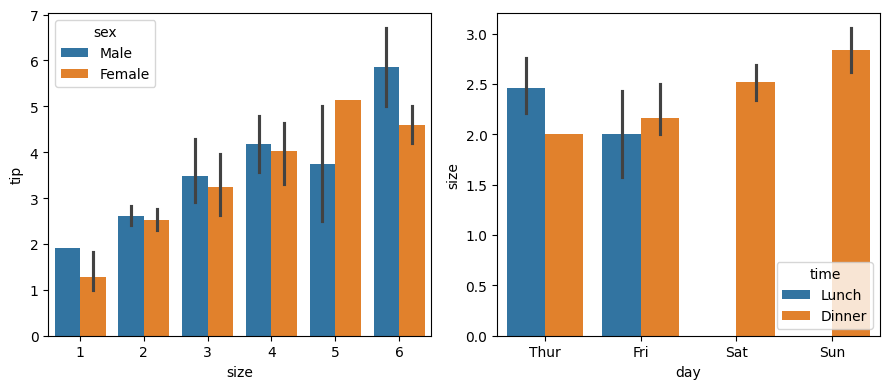

In [39]:
fig,ax=plt.subplots(1,2, figsize=(9,4))
sns.barplot(df_tips, x='size', y='tip',hue='sex', ax=ax[0])
sns.barplot(df_tips, x='day', y='size', hue='time' ,ax=ax[1])
plt.tight_layout()
plt.show()

In [9]:
media_tip_sex = df_tips[['tip','sex']].groupby('sex').mean()
media_tip_sex=media_tip_sex.sort_values(by='sex',ascending=False)
media_tip_sex

C:\Users\elena\AppData\Local\Temp\ipykernel_12504\2060644452.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_tip_sex = df_tips[['tip','sex']].groupby('sex').mean()


,tip
sex,
Female,2.833448
Male,3.089618


In [10]:
media_bill_time = df_tips[['total_bill','size']].groupby('size').mean()
media_bill_time=media_bill_time.sort_values(by='size',ascending=False)
media_bill_time

,total_bill
size,
6,34.830000
5,30.068000
4,28.613514
3,23.277632
2,16.448013
1,7.242500


In [42]:
media_tip_smoker = df_tips[['tip','smoker']].groupby('smoker').mean()
media_tip_smoker=media_tip_smoker.sort_values(by='smoker',ascending=False)
media_tip_smoker

C:\Users\elena\AppData\Local\Temp\ipykernel_12504\2848676991.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_tip_smoker = df_tips[['tip','smoker']].groupby('smoker').mean()


,tip
smoker,
No,2.991854
Yes,3.008710


### DIVIDIR LOS DATOS

In [13]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,  StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

In [12]:
train_set, test_set = train_test_split(df_tips, train_size=0.80, random_state=42)

### PREPARAR LOS DATOS

Cosas que hacer:
- Rellenos:
  - Moda: sex, time, smoker, size y day
  - Media: total_bill, tip
- Transformaciones:
  - sex: male y female --> 0 1
  - time: lunch y dinner --> 0 1
  - smoker: si, no --> 0 1
  - day: OneHotEncoder

In [17]:
# metodos para las pipelines
def sex_name(function_transformer, feature_names_in):
     return ['sex']
def time_name(function_transformer, feature_names_in):
     return ['time']
def smoker_name(function_transformer, feature_names_in):
     return ['smoker']
def day_name(function_transformer, feature_names_in):
     return ['day']

def sex_01(X):
          return np.where(X == 'female',1,0)     
def time_01(X):   
          return np.where(X == 'Lunch',1,0)
def smoker_01(X):
          return np.where(X == 'Si',1,0)

# imputers
imputer_moda = SimpleImputer(strategy="most_frequent")
imputer_media = SimpleImputer(strategy="mean")

# pipelines
sex_pipeline=make_pipeline(
     imputer_moda, 
     FunctionTransformer(sex_01,feature_names_out=sex_name)
)
time_pipeline=make_pipeline(
     imputer_moda, 
     FunctionTransformer(time_01,feature_names_out=time_name)
)
smoker_pipeline=make_pipeline(
     imputer_moda, 
     FunctionTransformer(smoker_01,feature_names_out=smoker_name)
)
day_pipeline = make_pipeline(
     imputer_moda, 
     OneHotEncoder(handle_unknown="ignore")
)

# megapipeline
pipeline = ColumnTransformer([
     ('smoker',smoker_pipeline, ['smoker']), # transforma No = 0 y Si = 1
     ('sex', sex_pipeline, ['sex']), # transforma male = 0 y female = 1
     ('time', time_pipeline, ['time']), # transforma Dinner = 0 y Lunch = 1
     ('total_bill', imputer_media,['total_bill']), # rellenar con la media
     ('tip', imputer_media,['tip']), #  rellenar con la media
     ('day', day_pipeline, ['day']) # hacer cambios a day
 ],
 remainder='passthrough',verbose_feature_names_out=False
 )


#meter los datos a la pipeline
test_set_prep = pipeline.fit_transform(test_set)
train_set_prep = pipeline.fit_transform(train_set)

#pasar los datos a dataframe
pipeline_column = pipeline.get_feature_names_out()   #nombres columnas
df_test_set = pd.DataFrame(test_set_prep, columns=pipeline_column)
df_train_set = pd.DataFrame(train_set_prep, columns=pipeline_column)
df_train_set.head()

,smoker,sex,time,total_bill,tip,day_Fri,day_Sat,day_Sun,day_Thur,size
0,0.0,0.0,0.0,13.28,2.72,0.0,1.0,0.0,0.0,2.0
1,0.0,0.0,0.0,24.27,2.03,0.0,1.0,0.0,0.0,2.0
2,0.0,0.0,0.0,27.28,4.00,1.0,0.0,0.0,0.0,2.0
3,0.0,0.0,0.0,31.71,4.50,0.0,0.0,1.0,0.0,4.0
4,0.0,0.0,1.0,15.98,2.03,0.0,0.0,0.0,1.0,2.0


## ENTRENAMIENTO Y EVALUACIÓN DEL MODELO

No hacer de momento

## OPTIMIZACIÓN DEL MODELO

No hacer de momento

### EVALUACIÓN EN EL CONJUNTO DE PRUEBA

No hacer de momento

## PRESENTACIÓN DE LA SOLUCIÓN

Ahora tienes que crear un archivo .py con todo lo necesario para que ejecute el modelo que acabamos de crear, en concreto el script tiene que ejecutar lo siguiente:
- Pedir un csv para predecir los datos (suponemos que los datos en el csv están bien)
- Cargamos los datos del csv en un dataframe.
- Aplicamos nuestro modelo al dataframe.
- Informamos al usuario de las predicciones.